# Assignment No 4 - Support Vector Machines

Problem Statement :
The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using SVM to predict
whether a student will get admission or not. 

A] Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if necessary.

B] Perform data-preparation (Train-Test Split)

C] Apply Machine Learning Algorithm

D] Evaluate Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


# Converting the data in "Chance of Admit" column in the form of 1's and 0's

In [6]:
df['Chance of Admit '] = df['Chance of Admit '].apply(lambda x : 1 if x >= 0.50 else 0)

# Declaring dependent and independent variable

In [8]:
X = df.drop(["Serial No.", "Chance of Admit "], axis=1)
Y = df["Chance of Admit "]

# Split the model into Training and testing part

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, random_state = 20)

In [10]:
print(xTrain)
print(xTest)
print(yTrain)
print(yTest)

     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
94         303           99                  3  2.0  2.5  7.66         0
91         299           97                  3  5.0  3.5  7.66         0
89         316          109                  4  4.5  3.5  8.76         1
329        297           96                  2  2.5  1.5  7.89         0
129        333          118                  5  5.0  5.0  9.35         1
..         ...          ...                ...  ...  ...   ...       ...
393        317          104                  2  3.0  3.0  8.76         0
218        324          110                  4  3.0  3.5  8.97         1
223        308          109                  2  3.0  4.0  8.45         0
271        299           96                  2  1.5  2.0  7.86         0
355        317          106                  2  2.0  3.5  8.12         0

[320 rows x 7 columns]
     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
10         325          106

# For Linear Kernel

In [11]:
linearKernelClassifier = SVC(kernel='linear')
linearKernelClassifier.fit(xTrain, yTrain)
yPred1 = linearKernelClassifier.predict(xTest)

# For Polynomial Kernel

In [12]:
polyKernelClassifier = SVC(kernel='poly')
polyKernelClassifier.fit(xTrain, yTrain)
yPred2 = polyKernelClassifier.predict(xTest)

# For RBF Kernel

In [13]:
rbfKernelClassifier = SVC(kernel='rbf')
rbfKernelClassifier.fit(xTrain, yTrain)
yPred3 = rbfKernelClassifier.predict(xTest)

# For Sigmoid kernel

In [14]:
sigmoidKernelClassifier = SVC(kernel='sigmoid')
sigmoidKernelClassifier.fit(xTrain, yTrain)
yPred4 = sigmoidKernelClassifier.predict(xTest)

In [15]:
final = pd.DataFrame({'Actual': yTest, 'Linear Kernel': yPred1, 'Polynomial Kernel': yPred2, 'RBF Kernel': yPred3, 'Sigmoid Kernel': yPred4})
final.head(20)

,Actual,Linear Kernel,Polynomial Kernel,RBF Kernel,Sigmoid Kernel
10,1,1,1,1,1
382,1,1,1,1,1
374,0,1,1,1,1
196,1,1,1,1,1
47,1,1,1,1,1
237,1,1,1,1,1
175,1,1,1,1,1
347,0,0,1,1,1
115,1,1,1,1,1
308,1,1,1,1,1


# Calculating accuracy score 

In [17]:
accuracyScore = pd.DataFrame({'Linear Kernel': accuracy_score(yTest, yPred1), 'Polynomial Kernel': accuracy_score(yTest, yPred2), 'RBF Kernel': accuracy_score(yTest, yPred3), 'Sigmoid Kernel': accuracy_score(yTest, yPred4)}, index = [0])
accuracyScore

,Linear Kernel,Polynomial Kernel,RBF Kernel,Sigmoid Kernel
0,0.925,0.8875,0.8875,0.8875


# Plotting and visualizing the model

Text(0, 0.5, 'Accuracy Score')

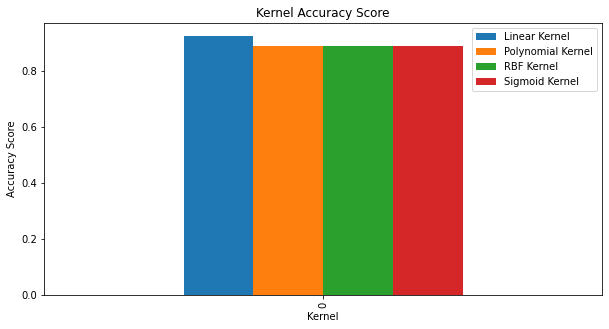

In [18]:
accuracyScore.plot(kind='bar', figsize=(10, 5))
plt.title("Kernel Accuracy Score")
plt.xlabel("Kernel")
plt.ylabel("Accuracy Score")

<AxesSubplot:>

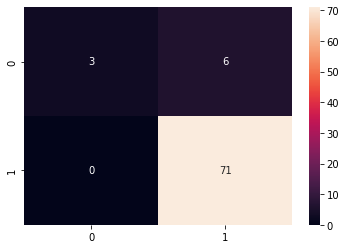

In [19]:
matrix = confusion_matrix(yTest, yPred1)
matrix
sns.heatmap(matrix, annot=True)